In [4]:
import pandas as pd 
import numpy as np 
import geopandas as gpd 
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import io
import json

In [11]:
snuffel1 = pd.read_csv("../data/external/resource_2019_05_27_2019_06_03.csv")
snuffel1['recording_time'] = pd.to_datetime(snuffel1['recording_time'], format="%Y-%m-%d %H:%M:%S")

snuffel2 = pd.read_csv("../data/external/resource_2020_05_11_2020_05_18.csv")
snuffel2['recording_time'] = pd.to_datetime(snuffel2['recording_time'], format="%Y-%m-%d %H:%M:%S")

snuffel3 = pd.read_csv("../data/external/resource_2020_09_14_2020_09_21.csv")
snuffel3['recording_time'] = pd.to_datetime(snuffel3['recording_time'], format="%Y-%m-%d %H:%M:%S")

snuffel4 = pd.read_csv("../data/external/resource_2021_04_19_2021_04_26.csv")
snuffel4['recording_time'] = pd.to_datetime(snuffel4['recording_time'], format="%Y-%m-%d %H:%M:%S")

In [21]:
snuffel1.describe(include='all')

<ipython-input-21-4d293a29f826>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  snuffel1.describe(include='all')


,sensor,air_quality_observed_id,lon,lat,recording_time,trip_sequence,humidity,pm10,pm1_0,pm2_5,pressure,temperature,voc,voltage,error_code,version_major,version_minor,acc_max,no2
count,2883,2.883000e+03,2883.000000,2883.000000,2883,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.000000,2883.00000,2883.000000,2883.0,2883.0,2883.0,2883.0,2883.000000
unique,2,NaN,NaN,NaN,2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0a7f8b81f789a752b6757f3016ed5cd5,NaN,NaN,NaN,2019-05-27 21:39:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2845,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2019-05-27 12:14:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-05-27 23:57:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.157495e+07,5.124413,52.105072,NaN,3.915713,43.748179,2.828651,2.720777,2.820673,1007.607353,20.937669,206.51266,4.221911,1.0,3.0,0.0,0.0,73.069025
std,NaN,1.739244e+03,0.000172,0.000100,NaN,0.465506,9.116928,1.735788,1.692354,1.742864,0.721323,2.141636,75.67120,0.004438,0.0,0.0,0.0,0.0,22.676398
min,NaN,1.157002e+07,5.123017,52.104430,NaN,1.000000,28.000000,0.000000,0.000000,0.000000,1006.000000,18.800000,109.00000,4.200000,1.0,3.0,0.0,0.0,42.000000
25%,NaN,1.157346e+07,5.124335,52.105020,NaN,4.000000,34.000000,1.000000,1.000000,1.000000,1007.000000,19.100000,131.00000,4.220000,1.0,3.0,0.0,0.0,56.000000


In [15]:
geo_snuffel = gpd.GeoDataFrame(snuffel4, geometry=gpd.points_from_xy(snuffel4['lon'],snuffel4['lat'], crs="EPSG:4326"))
geo_snuffel

,sensor,air_quality_observed_id,lon,lat,recording_time,trip_sequence,humidity,pm10,pm1_0,pm2_5,pressure,temperature,voc,voltage,error_code,version_major,version_minor,acc_max,no2,geometry
0,870ccc1f1d83cadef8081a5b448d2d53,66507980,3.594865,51.442955,2021-04-26 02:11:37,1,29,2,2,2,1024,28.3,74,4.17,0,1,8,0,0,POINT (3.59487 51.44296)
1,870ccc1f1d83cadef8081a5b448d2d53,66507979,3.594837,51.442970,2021-04-26 02:11:26,1,29,2,2,2,1024,28.3,74,4.17,0,1,8,0,0,POINT (3.59484 51.44297)
2,870ccc1f1d83cadef8081a5b448d2d53,66507978,3.594833,51.442986,2021-04-26 02:11:15,1,29,2,2,2,1024,28.3,74,4.18,0,1,8,0,0,POINT (3.59483 51.44299)
3,870ccc1f1d83cadef8081a5b448d2d53,66507976,3.594840,51.442986,2021-04-26 02:11:04,1,29,2,2,2,1024,28.3,73,4.18,0,1,8,0,0,POINT (3.59484 51.44299)
4,870ccc1f1d83cadef8081a5b448d2d53,66507977,3.594849,51.442978,2021-04-26 02:10:53,1,29,2,2,2,1024,28.3,74,4.17,0,1,8,0,0,POINT (3.59485 51.44298)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412959,a76be0daeadac96f1fbc75d2c8be558f,65626613,5.123262,52.079773,2021-04-19 12:00:59,0,31,4,4,4,1021,26.5,21,3.95,0,1,8,0,0,POINT (5.12326 52.07977)
412960,ff1e0955573487723d69c5674caad344,65626624,5.123703,52.079849,2021-04-19 12:00:53,0,38,11,10,11,1014,21.4,32,3.99,0,1,8,0,0,POINT (5.12370 52.07985)
412961,0f6d554844081f6d3912f79ffa84a369,65626602,5.123326,52.079559,2021-04-19 12:00:53,0,34,1,1,1,1015,26.7,37,3.98,0,1,8,0,0,POINT (5.12333 52.07956)
412962,0128cde766281222557042f895aa35d5,65626645,5.123240,52.079666,2021-04-19 12:00:50,0,31,3,3,3,1021,27.0,27,4.05,0,1,8,0,0,POINT (5.12324 52.07967)


<AxesSubplot:>

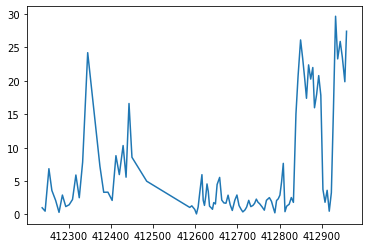

In [17]:
# Speed calculation

one_trip = geo_snuffel[(geo_snuffel["sensor"] == 'a76be0daeadac96f1fbc75d2c8be558f') & (geo_snuffel["trip_sequence"] == 0)]

one_trip = one_trip.to_crs("EPSG:3857") # from WGS84 Geographic to WGS84 Projected

one_trip['distance'] = one_trip.distance(one_trip.shift(1)) # distance between two consecutive measurements
one_trip['delta_time'] = one_trip['recording_time'].shift(1) - one_trip['recording_time'] # time_delta between two consecutive measurements
one_trip['speed_ms'] = one_trip['distance'] / one_trip['delta_time'].dt.seconds # avg(v)=x/t
one_trip['speed_kmh'] = one_trip['speed_ms'] * 3.6

one_trip['speed_kmh'].plot()

In [18]:
one_trip

,sensor,air_quality_observed_id,lon,lat,recording_time,trip_sequence,humidity,pm10,pm1_0,pm2_5,...,error_code,version_major,version_minor,acc_max,no2,geometry,distance,delta_time,speed_ms,speed_kmh
412230,a76be0daeadac96f1fbc75d2c8be558f,65629777,5.133286,52.080269,2021-04-19 12:28:54,0,33,0,0,0,...,0,1,8,0,0,POINT (571434.730 6814652.127),NaN,NaT,NaN,NaN
412237,a76be0daeadac96f1fbc75d2c8be558f,65629776,5.133262,52.080280,2021-04-19 12:28:42,0,33,0,0,0,...,0,1,8,0,0,POINT (571432.129 6814654.200),3.325998,0 days 00:00:12,0.277167,0.997799
412244,a76be0daeadac96f1fbc75d2c8be558f,65629775,5.133277,52.080280,2021-04-19 12:28:30,0,33,0,0,0,...,0,1,8,0,0,POINT (571433.775 6814654.200),1.645519,0 days 00:00:12,0.137127,0.493656
412253,a76be0daeadac96f1fbc75d2c8be558f,65629774,5.133288,52.080406,2021-04-19 12:28:18,0,33,0,0,0,...,0,1,8,0,0,POINT (571435.049 6814677.002),22.838132,0 days 00:00:12,1.903178,6.851440
412260,a76be0daeadac96f1fbc75d2c8be558f,65629542,5.133342,52.080463,2021-04-19 12:28:06,0,33,0,0,0,...,0,1,8,0,0,POINT (571441.047 6814687.367),11.975301,0 days 00:00:12,0.997942,3.592590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412938,a76be0daeadac96f1fbc75d2c8be558f,65626837,5.124846,52.081081,2021-04-19 12:01:48,0,30,3,3,3,...,0,1,8,0,0,POINT (570495.298 6814799.308),77.635459,0 days 00:00:12,6.469622,23.290638
412944,a76be0daeadac96f1fbc75d2c8be558f,65626616,5.124021,52.080986,2021-04-19 12:01:35,0,30,4,4,4,...,0,1,8,0,0,POINT (570403.361 6814782.033),93.545664,0 days 00:00:13,7.195820,25.904953
412949,a76be0daeadac96f1fbc75d2c8be558f,65626615,5.123709,52.080597,2021-04-19 12:01:23,0,30,4,4,4,...,0,1,8,0,0,POINT (570368.699 6814711.552),78.543523,0 days 00:00:12,6.545294,23.563057
412955,a76be0daeadac96f1fbc75d2c8be558f,65626614,5.123565,52.080242,2021-04-19 12:01:11,0,30,4,4,4,...,0,1,8,0,0,POINT (570352.669 6814647.290),66.231193,0 days 00:00:12,5.519266,19.869358
